https://www.ibm.com/topics/decision-trees


https://scikit-learn.org/stable/modules/tree.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset Files/hr_data.csv")

In [4]:
df.shape

(1000, 13)

In [5]:
df.head()

,EmployeeID,Age,Gender,Department,JobRole,Education,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany,YearsWithCurrManager,PerformanceRating,PromotionStatus
0,1,56,Male,Sales,Manager,3,Married,16330,Yes,9,2,2,Promoted
1,2,46,Male,Sales,Manager,1,Single,6891,Yes,22,13,2,Promoted
2,3,32,Female,Finance,Engineer,1,Divorced,6992,No,10,18,4,Not Promoted
3,4,25,Female,Sales,HR Specialist,1,Married,3961,No,1,15,4,Promoted
4,5,38,Male,HR,HR Specialist,2,Married,14497,Yes,25,6,2,Promoted


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EmployeeID            1000 non-null   int64 
 1   Age                   1000 non-null   int64 
 2   Gender                1000 non-null   object
 3   Department            1000 non-null   object
 4   JobRole               1000 non-null   object
 5   Education             1000 non-null   int64 
 6   MaritalStatus         1000 non-null   object
 7   MonthlyIncome         1000 non-null   int64 
 8   OverTime              1000 non-null   object
 9   YearsAtCompany        1000 non-null   int64 
 10  YearsWithCurrManager  1000 non-null   int64 
 11  PerformanceRating     1000 non-null   int64 
 12  PromotionStatus       1000 non-null   object
dtypes: int64(7), object(6)
memory usage: 101.7+ KB


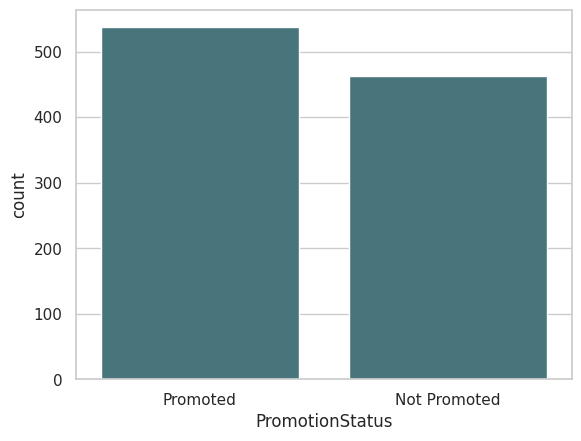

In [8]:
sns.countplot(data=df, x='PromotionStatus');
#check if class is not imbalanced

In [9]:
df['Department'].unique()

array(['Sales', 'Finance', 'HR', 'Development'], dtype=object)

In [10]:
df['JobRole'].unique()

array(['Manager', 'Engineer', 'HR Specialist', 'Sales Executive'],
      dtype=object)

In [11]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

label_encoders: This dictionary will store the LabelEncoder objects for each categorical column. This allows you to keep track of the encoders used for each column and, if needed, reverse the encoding later.

for column in [...]: This loop iterates over a list of column names that need to be encoded.

'Gender', 'Department', 'JobRole', 'MaritalStatus', 'OverTime', 'PromotionStatus': These are the column names in the DataFrame df that contain categorical data.

le = LabelEncoder(): Creates an instance of LabelEncoder, which will be used to convert categorical values to numerical values.

le.fit_transform(df[column]):
fit_transform(df[column]): Fits the LabelEncoder to the unique values in the specified column and then transforms those values into numerical format.

fit(): Finds all unique categories in the column and assigns each a unique integer.

transform(): Converts the categorical values in the column into their corresponding integers based on the mapping created in the fit() step.

df[column] = ...: Updates the DataFrame df by replacing the original categorical values with their encoded numerical values.

label_encoders[column] = le: Stores the LabelEncoder object in the label_encoders dictionary, with the column name as the key. This allows you to keep track of which encoder was used for which column.

In [12]:
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Department', 'JobRole', 'MaritalStatus', 'OverTime', 'PromotionStatus']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
df['Department'].unique()

array([3, 1, 2, 0])

In [14]:
df['JobRole'].unique()

array([2, 0, 1, 3])

In [15]:
df['MaritalStatus'].unique()

array([1, 2, 0])

In [16]:
df.head()

,EmployeeID,Age,Gender,Department,JobRole,Education,MaritalStatus,MonthlyIncome,OverTime,YearsAtCompany,YearsWithCurrManager,PerformanceRating,PromotionStatus
0,1,56,1,3,2,3,1,16330,1,9,2,2,1
1,2,46,1,3,2,1,2,6891,1,22,13,2,1
2,3,32,0,1,0,1,0,6992,0,10,18,4,0
3,4,25,0,3,1,1,1,3961,0,1,15,4,1
4,5,38,1,2,1,2,1,14497,1,25,6,2,1


In [17]:
# Separate features and target variable
X = df.drop(columns=['EmployeeID', 'PromotionStatus'])
y = df['PromotionStatus']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler():
Creates an instance of StandardScaler, which standardizes features by removing the mean and scaling to unit variance (i.e., it scales the features so they have a mean of 0 and a standard deviation of 1).

X_train = scaler.fit_transform(X_train):
fit_transform(X_train): Fits the scaler to the training data and then transforms it.

fit(): Computes the mean and standard deviation of each feature from X_train.

transform(): Scales the features using the computed mean and standard deviation.

X_train: The training data is now standardized, meaning each feature has been scaled to have a mean of 0 and a standard deviation of 1.

X_test = scaler.transform(X_test):

transform(X_test): Scales the test data using the mean and standard deviation computed from the training data.

X_test: The test data is standardized in the same way as the training data, ensuring that the scaling is consistent.

clf = DecisionTreeClassifier(random_state=42):
Creates an instance of DecisionTreeClassifier, which is a machine learning model used for classification tasks.

random_state=42: Sets a random seed for reproducibility. This ensures that if the code is run multiple times, the results will be the same, given the same input data.

clf.fit(X_train, y_train):
fit(X_train, y_train): Trains the decision tree model using the standardized training data (X_train) and the corresponding labels (y_train).

clf.predict(X_test):
Uses the trained model to predict the class labels for the test data (X_test).
y_pred: Contains the predicted class labels for the test set.

accuracy = accuracy_score(y_test, y_pred):
accuracy_score(y_test, y_pred): Computes the accuracy of the model by comparing the true labels (y_test) with the predicted labels (y_pred).

accuracy: The proportion of correctly classified samples out of the total number of samples in the test set.

report = classification_report(y_test, y_pred):
classification_report(y_test, y_pred): Generates a report that includes precision, recall, and F1-score for each class, as well as the overall accuracy.

report: Provides a detailed performance evaluation of the model for each class, including how well the model performs in terms of precision (positive predictions), recall (true positive rate), and F1-score (harmonic mean of precision and recall).

print(accuracy) and print(report):
Prints the accuracy score and the classification report to the console.


In [19]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)


0.54
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       128
           1       0.61      0.54      0.57       172

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.55      0.54      0.54       300



params: A dictionary specifying the hyperparameters and their values that will be tested during the grid search.

"criterion": The function used to measure the quality of a split. Possible values are "gini" and "entropy".

"splitter": The strategy used to choose the split at each node. Possible values are "best" and "random".

"max_depth": The maximum depth of the tree. Values range from 1 to 10.

"min_samples_split": The minimum number of samples required to split an internal node. Possible values are 2, 3, and 4.

"min_samples_leaf": The minimum number of samples required to be at a leaf node. Values range from 1 to 10.

tree_clf: An instance of DecisionTreeClassifier, initialized with random_state=42 to ensure reproducibility. This sets a seed for random number generation used in some algorithms.

tree_cv: An instance of GridSearchCV used to search for the best hyperparameters.

tree_clf: The model to be tuned.

params: The hyperparameters and their values to be tested.

scoring="accuracy": The metric used to evaluate the model's performance. In this case, accuracy is used.

n_jobs=-1: Uses all available CPU cores to perform the grid search, speeding up the process.

verbose=1: Provides detailed output about the progress of the grid search.

cv=3: Specifies 3-fold cross-validation, meaning the data will be split into 3 parts, and each part will be used once as a test set while the remaining parts are used for training.

fit(X_train, y_train):
Fits GridSearchCV to the training data (X_train and y_train).
This involves training the DecisionTreeClassifier with each combination of hyperparameters specified in params and evaluating them using cross-validation.

best_params = tree_cv.best_params_:

Retrieves the hyperparameters that resulted in the best performance based on the scoring metric (accuracy in this case).

print(f"\nBest parameters:\n{best_params}"):
Prints the best hyperparameters found during the grid search.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 11))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 11)),
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)

best_params = tree_cv.best_params_
print(f"\nBest paramters:\n{best_params}")

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits

Best paramters:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'random'}


In [21]:
tree_clf = DecisionTreeClassifier(**best_params);
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, splitter='random')

clf: The trained classifier (e.g., a model like DecisionTreeClassifier, SVC, etc.).

X: The feature matrix on which the classifier will make predictions.

y: The true target values corresponding to X.

split: A string or identifier to denote the dataset split (e.g., 'train', 'test') or the specific fold of cross-validation. This helps in labeling the output when you are evaluating different splits.

clf.predict(X):
Uses the trained classifier (clf) to make predictions on the feature matrix X.
pred: An array or list of predicted class labels.

classification_report(y, pred, output_dict=True):

classification_report: A function from Scikit-Learn that computes various classification metrics, including precision, recall, and F1-score for each class.

y: The true target values.

pred: The predicted class labels.

output_dict=True: Returns the report as a dictionary rather than a string. This allows further manipulation and conversion into a DataFrame.
pd.DataFrame(...):

Converts the classification report dictionary into a Pandas DataFrame.
clf_report: A DataFrame where each row corresponds to a class and contains metrics such as precision, recall, F1-score, and support.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X, y, split):
    pred = clf.predict(X)
    clf_report = pd.DataFrame(classification_report(y, pred, output_dict=True))
    print(f"{split} Result: (Accuracy Score: {accuracy_score(y, pred) * 100:.2f}%)");
    print("__________________________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
    print("__________________________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(y, pred)}\n")

In [23]:
print_score(tree_clf, X_train, y_train, 'Train')
print_score(tree_clf, X_test, y_test, 'Test')

Train Result: (Accuracy Score: 55.43%)
__________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.582734    0.547237  0.554286    0.564985      0.564225
recall       0.241791    0.841096  0.554286    0.541443      0.554286
f1-score     0.341772    0.663067  0.554286    0.502420      0.509304
support    335.000000  365.000000  0.554286  700.000000    700.000000
__________________________________________________________
Confusion Matrix: 
 [[ 81 254]
 [ 58 307]]

Test Result: (Accuracy Score: 52.33%)
__________________________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.409639    0.566820  0.523333    0.488229      0.499756
recall       0.265625    0.715116  0.523333    0.490371      0.523333
f1-score     0.322275    0.632391  0.523333    0.477333      0.500075
support    128.000000  172

In [24]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

StringIO(): Creates an in-memory stream for text data. This allows you to capture the DOT format data generated by export_graphviz in a string buffer (dot_data).

export_graphviz: A function from Scikit-Learn that exports a decision tree as a DOT file, which is a plain text graph description language.

tree_clf: The trained decision tree classifier you want to visualize.

out_file=dot_data: Specifies the output destination for the DOT format data. In this case, it writes to the dot_data string buffer.

filled=True: Colors the nodes according to the class they represent.

rounded=True: Rounds the corners of the nodes.

feature_names=X.columns: Labels the nodes with feature names. X.columns provides the names of the features used to train the tree.

dot_data.getvalue(): Retrieves the DOT format data from the StringIO buffer.

pydotplus.graph_from_dot_data(...):
pydotplus: A Python library that parses DOT format data and creates graph objects.

graph_from_dot_data: Converts the DOT format data into a pydotplus graph object.

graph: A graph object representing the decision tree.

graph.create_png(): Converts the graph object into a PNG image in binary format.

Image(...): A function from the IPython display module that renders the image.

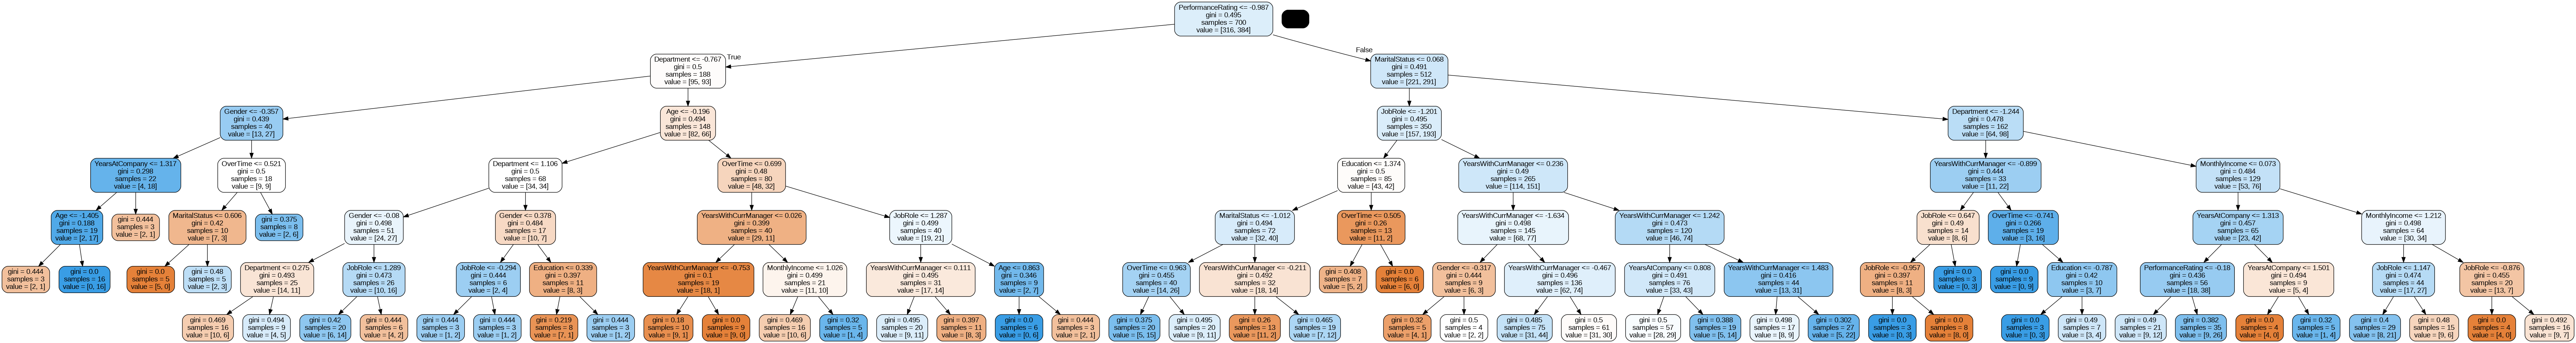

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())